<a href="https://colab.research.google.com/github/RodrigoCasanova/Backend/blob/main/FMY0100_2025_Entrega_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evaluación 1

---



**Autores:** Rodrigo Casanova, Jose Paillan, Samuel Acuña

**Correo Electrónico:** rodr.casanova@duocuc.cl, jos.paillan@duocuc.cl, sam.acuna@duocuc.cl

**Fecha de Creación:** Septiembre 2025

**Versión:** 1.0  



---

## Descripción

Este notebook corresponde al desarrollo de la entrega 1 de la asignatura electiva de Fudnamentos de Machine Learning de DuocUC - Sede Concepción

---

## Requisitos de Software

Este notebook fue desarrollado con Python 3.9. A continuación se listan las bibliotecas necesarias:

-
-

Para verificar la versión instalada ejecutar usando el siguiente comando, usando la librería de la cual quieres saber la versión:

```bash
import pandas as pd
print(pd.__version__)
````

# Puntajes y descuentos

**Actividades (1 punto cada una)**

1.	Fase 1 - Análisis de datos entregados para regresión
2.	Fase 1 - Análisis de datos entregados para clasificación
3.	Fase 1 - Análisis de otros datos no presentes
4.	Fase 1 - Definición de objetivos Fase 2
5.	Fase 1 - Definición de objetivos Fase 3
6.	Fase 1 - Definición de objetivos Fase 4
7.	Fase 1 - Definición de objetivos Fase 5
8.	Fase 2 - Análisis de tipos de datos
9.	Fase 2 - Existencia de nulos
10.	Fase 2 - Existencia de duplicados
11.	Fase 2 - Existencia de atípicos
12.	Fase 2 - Cálculo de estadísticos de variable continua
13.	Fase 2 - Interpretación de estadísticos de variable continua
14.	Fase 2 - Cálculo de estadísticos de variable discreta
15.	Fase 2 - Interpretación de estadísticos de variable discreta
16.	Fase 2 - Aplicación CORRECTA de prueba ANOVA
17.	Fase 2 - Análisis de distribución de una variable
18.	Fase 2 - Análisis correcto de correlación
19.	Fase 3 - Justificación y aplicación correcta de transformación de variable continua
20.	Fase 3 - Justificación y aplicación correcta de transformación de variable discreta
21.	Fase 3 - Análisis de distribución de variable continua ANTES y DESPUÉS de transformación

**DESCUENTOS SOBRE PUNTAJE FINAL**

1. Ausencia de buenas prácticas	10%
2. Ausencia de formato base de notebook	10%
3. Falta identificación de autores trabajo	10%
4. Faltas de ortografía y readacción 10%

In [ ]:
!wget https://www.dropbox.com/s/sst1u94436vqca6/demo_round_traces.csv

--2025-09-29 18:11:14--  https://www.dropbox.com/s/sst1u94436vqca6/demo_round_traces.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.4.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.4.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/ujmigz0ky1r9ps75u8h1d/demo_round_traces.csv?rlkey=24f4k6ipomzkq1lj8kz2gayds [following]
--2025-09-29 18:11:15--  https://www.dropbox.com/scl/fi/ujmigz0ky1r9ps75u8h1d/demo_round_traces.csv?rlkey=24f4k6ipomzkq1lj8kz2gayds
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc462fbff8f55db1f6af726c2be8.dl.dropboxusercontent.com/cd/0/inline/CyT8CK-UhiEJhZvaoBKITCXSC1t_kFJRKlB0oO7pFZ75AZY_aILkMFVCIz3kJSiB14EDfjBWt55GGa7T31HxfriTNNV5XXHQc7oVLm4Nr-RBTcGzGbYb9Qdx_Gkd9Lu98-ysj7twxHgnHy-yyoBSwFBK/file# [following]
--2025-09-29 18:11:15--  https://uc462fbff8f55db1f6af726c2be8.dl.dropboxus

In [ ]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, StandardScaler

# Fase 1 - Comprensión del negocio

## Análisis de datos entregados

En esta sección deberá analizar si los datos entregados son relevantes o si servirán para poder realizar predicciones en tareas de regresión y clasificación.

In [ ]:
data = pd.read_csv("demo_round_traces.csv", sep=';')

data.head()

,Unnamed: 0,Map,Team,InternalTeamId,MatchId,RoundId,SteamId,RoundWinner,MatchWinner,Survived,...,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots,AvgMatchKillDist
0,600,de_inferno,Terrorist,1,4,1,76561198036987787,False,True,False,...,0,0,0,750,4400,0,0,0,0,501379.183091
1,601,de_inferno,Terrorist,1,4,1,76561197971812216,False,True,False,...,0,0,0,800,4400,0,0,0,0,208807.587297
2,602,de_inferno,Terrorist,1,4,1,76561197972240652,False,True,False,...,0,0,0,1000,4400,0,0,0,0,381652.027911
3,603,de_inferno,Terrorist,1,4,1,76561197975824962,False,True,False,...,0,0,0,850,4400,0,0,0,0,289754.503091
4,604,de_inferno,Terrorist,1,4,1,76561197960331095,False,True,True,...,0,0,0,1000,4400,0,0,0,0,254527.691176


In [ ]:
# Cantidad de observaciones y características
data.shape

(79157, 37)

In [ ]:
data.describe().columns

Index(['Unnamed: 0', 'InternalTeamId', 'MatchId', 'RoundId', 'SteamId',
       'TimeAlive', 'ScaledTimeAlive', 'AvgCentroidDistance',
       'TravelledDistance', 'AvgRoundVelocity', 'AvgKillDistance',
       'AvgSiteDistance', 'RLethalGrenadesThrown', 'RNonLethalGrenadesThrown',
       'PrimaryAssaultRifle', 'PrimarySniperRifle', 'PrimaryHeavy',
       'PrimarySMG', 'PrimaryPistol', 'FirstKillTime', 'RoundKills',
       'RoundAssists', 'RoundHeadshots', 'RoundFlankKills',
       'RoundStartingEquipmentValue', 'TeamStartingEquipmentValue',
       'MatchKills', 'MatchFlankKills', 'MatchAssists', 'MatchHeadshots',
       'AvgMatchKillDist'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79157 entries, 0 to 79156
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   79157 non-null  int64  
 1   Map                          79157 non-null  object 
 2   Team                         79157 non-null  object 
 3   InternalTeamId               79157 non-null  int64  
 4   MatchId                      79157 non-null  int64  
 5   RoundId                      79157 non-null  int64  
 6   SteamId                      79157 non-null  int64  
 7   RoundWinner                  79157 non-null  bool   
 8   MatchWinner                  79157 non-null  bool   
 9   Survived                     79157 non-null  bool   
 10  AbnormalMatch                79157 non-null  bool   
 11  TimeAlive                    79157 non-null  float64
 12  ScaledTimeAlive              79157 non-null  float64
 13  AvgCentroidDista

Variables candidatas para regresión:
# Continuas:



- TeamStartingEquipmentValue: Valor promedio del equipamiento llevado por el equipo del jugador al inicio de la ronda.
- TimeAlive: Indica el tiempo en segundos que el jugador estuvo vivo durante el juego.
- ScaledTimeAlive: Tiempo normalizado que el jugador estuvo vivo durante la partida.
- TravelledDistance: Distancia total recorrida por el jugador durante la partida.
- AvgCentroidDistance: Distancia promedio desde el centro del equipo durante la ronda.
- AvgRoundVelocity: Velocidad promedio del jugador durante la ronda.
- AvgKillDistance: Distancia promedio a la que el jugador realizó sus kills.
- AvgSiteDistance: Distancia promedio a los objetivos del mapa durante la ronda.
- FirstKillTime: Tiempo transcurrido hasta que el jugador realizó su primera kill.
- AvgMatchKillDist: Distancia promedio de kills a lo largo de toda la partida.
- PrimaryAssaultRifle / PrimarySniperRifle / PrimaryHeavy / PrimarySMG / PrimaryPistol: Porcentaje de uso del arma clasificada como primaria.

# Discretas:
- RoundKills / MatchKills: Cantidad de kills efectuados por el jugador durante la ronda o la partida.
- RoundAssists / MatchAssists: Cantidad de asistencias efectuadas por el jugador durante la ronda o la partida.
- RoundHeadshots / MatchHeadshots: Cantidad de kills a la cabeza realizadas durante la ronda o la partida.
- RoundFlankKills / MatchFlankKills: Cantidad de kills realizados sin ser vistos durante la ronda o la partida.
- RLethalGrenadesThrown / RNonLethalGrenadesThrown: Cantidad de granadas lanzadas, categorizadas en letales y no-letales.
- RoundStartingEquipmentValue: Valor del equipamiento llevado por el jugador al inicio de la ronda.


# categóricas



- Map: Nombre del mapa donde se jugó la partida.
- Team: Nombre del equipo al que pertenece el jugador.
- RoundWinner: Indica si el equipo ganó la ronda.
- MatchWinner: Indica si el equipo ganó la partida.
- Survived: Indica si el jugador sobrevivió durante la ronda.
- AbnormalMatch: Indica si la partida fue considerada anormal.

# **1. Análisis de datos entregados para regresión**

Los datos muestran información sobre los jugadores, como cuánto tiempo duran vivos, qué tan lejos se mueven y qué armas usan, y creo que pueden servir para predecir cosas numéricas, como la cantidad de kills o el tiempo de supervivencia. Algunas cifras son muy altas o muy bajas, pero se podrían limpiar o ajustar para que los modelos funcionen mejor. En general, pienso que los datos son útiles para hacer predicciones, aunque no tenga mucha experiencia en el tema.





# 2. **Análisis de datos entregados para clasificación**

Los datos también podrían servir para tareas de clasificación, por ejemplo, para predecir si un jugador usará cierto tipo de arma o si sobrevivirá más de un tiempo determinado. Hay muchas variables que parecen influir en estas decisiones, como la distancia recorrida o el tiempo de la primera kill. Aunque algunas cifras sean extremas, con un poco de limpieza se podrían usar para entrenar modelos que clasifiquen a los jugadores en diferentes categorías. Creo que los datos son útiles para esto, aunque no tenga mucha experiencia en análisis de datos.

# 3. **Análisis de otros datos no presentes**

Además de los datos que ya tenemos, sería útil contar con información como kills por minuto, distancia recorrida por segundo, proporción de headshots o asistencias, diferencias en el valor del equipamiento con respecto al equipo, y estadísticas de rendimiento de rondas anteriores como promedio de kills o tiempo vivo. También sería interesante una clasificación simple de supervivencia. Estos datos permitirían un análisis más completo porque muestran el desempeño real y consistente de cada jugador, no solo en una ronda, y ayudarían a predecir mejor su comportamiento en futuras partidas.

# 4. Definición de objetivos Fase 2

 Limpieza y análisis descriptivo

Objetivo:

Revisar y preparar los datos para asegurarnos de que sean confiables y consistentes.

Explorar los números, las categorías y los valores atípicos para comprender mejor cómo se comportan.

Obtener una primera visión de patrones, tendencias y relaciones entre variables que nos sirvan de guía.


# 5. Definición de objetivos Fase 3


Transformación de variables

Objetivo:

Ajustar los datos para que estén listos para el análisis y modelado, haciéndolos más fáciles de interpretar.

Transformar o reorganizar variables de manera que reflejen mejor la información que queremos estudiar.

Observar cómo cambian los datos después de estos ajustes, asegurándonos de que sean más claros y útiles.


# 6. Definición de objetivos Fase 4

Objetivo:

Construir modelos que nos permitan entender relaciones entre variables y hacer predicciones significativas.

Probar diferentes enfoques para ver qué funciona mejor, sin perder de vista la interpretación y el sentido de los resultados.

Explorar cómo las distintas características de los jugadores y equipos influyen en los resultados de las partidas.

# 7. Definición de objetivos Fase 5

Interpretación y comunicación de resultados

Objetivo:

Analizar los hallazgos de los modelos y extraer conclusiones claras y útiles.

Presentar los resultados de manera comprensible, visual y cercana, para que cualquiera pueda entenderlos.

Reflexionar sobre lo aprendido y generar recomendaciones que tengan sentido para futuras decisiones o análisis.

# Fase 2 - Comprensión de los datos



# 8. Análisis de tipos de datos

# Continuas:



- TeamStartingEquipmentValue: Valor promedio del equipamiento llevado por el equipo del jugador al inicio de la ronda.
- TimeAlive: Indica el tiempo en segundos que el jugador estuvo vivo durante el juego.
- ScaledTimeAlive: Tiempo normalizado que el jugador estuvo vivo durante la partida.
- TravelledDistance: Distancia total recorrida por el jugador durante la partida.
- AvgCentroidDistance: Distancia promedio desde el centro del equipo durante la ronda.
- AvgRoundVelocity: Velocidad promedio del jugador durante la ronda.
- AvgKillDistance: Distancia promedio a la que el jugador realizó sus kills.
- AvgSiteDistance: Distancia promedio a los objetivos del mapa durante la ronda.
- FirstKillTime: Tiempo transcurrido hasta que el jugador realizó su primera kill.
- AvgMatchKillDist: Distancia promedio de kills a lo largo de toda la partida.
- PrimaryAssaultRifle / PrimarySniperRifle / PrimaryHeavy / PrimarySMG / PrimaryPistol: Porcentaje de uso del arma clasificada como primaria.

# Discretas:
- RoundKills / MatchKills: Cantidad de kills efectuados por el jugador durante la ronda o la partida.
- RoundAssists / MatchAssists: Cantidad de asistencias efectuadas por el jugador durante la ronda o la partida.
- RoundHeadshots / MatchHeadshots: Cantidad de kills a la cabeza realizadas durante la ronda o la partida.
- RoundFlankKills / MatchFlankKills: Cantidad de kills realizados sin ser vistos durante la ronda o la partida.
- RLethalGrenadesThrown / RNonLethalGrenadesThrown: Cantidad de granadas lanzadas, categorizadas en letales y no-letales.
- RoundStartingEquipmentValue: Valor del equipamiento llevado por el jugador al inicio de la ronda.


# categóricas



- Map: Nombre del mapa donde se jugó la partida.
- Team: Nombre del equipo al que pertenece el jugador.
- RoundWinner: Indica si el equipo ganó la ronda.
- MatchWinner: Indica si el equipo ganó la partida.
- Survived: Indica si el jugador sobrevivió durante la ronda.
- AbnormalMatch: Indica si la partida fue considerada anormal.

# 9. Existencia de nulos

In [ ]:
nulos = data.isna().sum()
print(f"Valores nulos por columna: {nulos}")

Valores nulos por columna: Unnamed: 0                     0
Map                            0
Team                           0
InternalTeamId                 0
MatchId                        0
RoundId                        0
SteamId                        0
RoundWinner                    0
MatchWinner                    0
Survived                       0
AbnormalMatch                  0
TimeAlive                      0
ScaledTimeAlive                0
AvgCentroidDistance            0
TravelledDistance              0
AvgRoundVelocity               0
AvgKillDistance                0
AvgSiteDistance                0
RLethalGrenadesThrown          0
RNonLethalGrenadesThrown       0
PrimaryAssaultRifle            0
PrimarySniperRifle             0
PrimaryHeavy                   0
PrimarySMG                     0
PrimaryPistol                  0
FirstKillTime                  0
RoundKills                     0
RoundAssists                   0
RoundHeadshots                 0
RoundFlankKills 

# 10. Existencia de duplicados

In [ ]:
duplicados = data.duplicated().sum()
print(f"Cantidad de filas duplicadas: {duplicados}")


Cantidad de filas duplicadas: 0


# 11. Existencia de atípicos

In [ ]:
# Función para buscar outliers en una columna
def buscar_atipicos(data : pd.DataFrame, columna : str) -> pd.DataFrame:
    """
    Busca valores atípicos en una columna.
    """
    Q1 = data[columna].quantile(0.25)
    Q3 = data[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    return data[(data[columna] < limite_inferior) | (data[columna] > limite_superior)]

# Función para contar los atípicos de varias columnas
def obtener_cantidad_atipicos(data : pd.DataFrame, columnas : list) -> dict:
    """
    Obtiene la cantidad de atípicos por cada columna.
    """
    total_atipicos = {}
    for columna in columnas:
        atipicos = buscar_atipicos(data, columna)
        total_atipicos[columna] = atipicos.shape[0]
    return total_atipicos

# Columnas numéricas del dataset
columnas_numericas = data.select_dtypes(include=['int64', 'float64']).columns

# Obtener cantidad de atípicos por columna
atipicos_por_columna = obtener_cantidad_atipicos(data, columnas_numericas)

# Mostrar resultados
atipicos_por_columna

{'Unnamed: 0': 0,
 'InternalTeamId': 0,
 'MatchId': 0,
 'RoundId': 0,
 'SteamId': 4584,
 'TimeAlive': 594,
 'ScaledTimeAlive': 749,
 'AvgCentroidDistance': 1707,
 'TravelledDistance': 1262,
 'AvgRoundVelocity': 142,
 'AvgKillDistance': 7616,
 'AvgSiteDistance': 959,
 'RLethalGrenadesThrown': 98,
 'RNonLethalGrenadesThrown': 15,
 'PrimaryAssaultRifle': 0,
 'PrimarySniperRifle': 9570,
 'PrimaryHeavy': 561,
 'PrimarySMG': 656,
 'PrimaryPistol': 17556,
 'FirstKillTime': 488,
 'RoundKills': 3505,
 'RoundAssists': 10692,
 'RoundHeadshots': 19582,
 'RoundFlankKills': 6962,
 'RoundStartingEquipmentValue': 0,
 'TeamStartingEquipmentValue': 0,
 'MatchKills': 162,
 'MatchFlankKills': 1184,
 'MatchAssists': 781,
 'MatchHeadshots': 724,
 'AvgMatchKillDist': 3733}

# 12. Cálculo de estadísticos de variable continua

In [ ]:
columnas_continuas = [
    "TeamStartingEquipmentValue", "TimeAlive", "ScaledTimeAlive", "TravelledDistance",
    "AvgCentroidDistance", "AvgRoundVelocity", "AvgKillDistance", "AvgSiteDistance",
    "FirstKillTime", "AvgMatchKillDist",
    "PrimaryAssaultRifle", "PrimarySniperRifle", "PrimaryHeavy", "PrimarySMG", "PrimaryPistol"
]

# Calcular estadísticas de variables continuas
estadisticas_continuas = data[columnas_continuas].describe().T
estadisticas_continuas

,count,mean,std,min,25%,50%,75%,max
TeamStartingEquipmentValue,79157.0,1.889013e+04,9.743203e+03,0.0,1.090000e+04,2.255000e+04,2.605000e+04,3.615000e+04
TimeAlive,79157.0,7.279572e+01,4.832104e+01,0.0,4.708007e+01,6.923962e+01,9.264781e+01,2.990560e+03
ScaledTimeAlive,79157.0,8.295609e-01,2.108421e-01,0.0,6.988916e-01,9.227766e-01,1.000000e+00,2.000000e+00
TravelledDistance,79157.0,1.041888e+05,3.543487e+05,0.0,5.898255e+04,8.601557e+04,1.213966e+05,3.964645e+07
AvgCentroidDistance,79157.0,1.122538e+06,1.134700e+06,0.0,2.578825e+05,7.409804e+05,1.753172e+06,2.202346e+07
AvgRoundVelocity,79157.0,8.435177e+01,1.718901e+02,0.0,5.620264e+01,8.361732e+01,1.041311e+02,2.411182e+04
AvgKillDistance,79157.0,2.880379e+05,6.036307e+05,0.0,0.000000e+00,0.000000e+00,3.603394e+05,1.104564e+07
AvgSiteDistance,79157.0,2.828657e+06,1.528175e+06,0.0,1.508095e+06,2.699214e+06,3.728018e+06,1.203440e+07
FirstKillTime,79157.0,5.806682e+01,3.242443e+01,0.0,3.627324e+01,5.477419e+01,7.906590e+01,5.450349e+02
AvgMatchKillDist,79157.0,6.288927e+05,3.402574e+05,0.0,4.097790e+05,5.542432e+05,7.524568e+05,5.170168e+06


# 13. Interpretación de variable continua: TimeAlive

- **Variable:** TimeAlive
- **Media:** 72.80
- **Mediana:** 47.08
- **Desviación estándar:** 48.32
- **Mínimo:** 0.00
- **Máximo:** 2990.56

**Observaciones:**
- No hay valores nulos en esta variable.
- Hay algunos valores muy altos que podrían ser outliers, por ejemplo 2990.56 segundos, que son mucho más grandes que la mayoría de los tiempos de supervivencia.

**Interpretación personal:**
Esta variable muestra cuánto tiempo sobrevive un jugador en una partida. Como la media es más alta que la mediana, se nota que hay unos pocos valores extremos que hacen que la media suba. Además, la desviación estándar es bastante alta, lo que indica que los tiempos varían mucho entre los jugadores. Para poder usar esta variable en predicciones, conviene tener cuidado con los valores muy altos porque pueden afectar los resultados del modelo.


# 14. Cálculo de estadísticos de variable discreta

In [ ]:
# Columnas discretas
columnas_discretas = [
    "RoundAssists", "MatchAssists",
    "RoundKills", "MatchKills",
    "RLethalGrenadesThrown", "RNonLethalGrenadesThrown",
    "RoundFlankKills", "MatchFlankKills",
    "RoundHeadshots", "MatchHeadshots",
    "RoundStartingEquipmentValue"
]

# Estadísticos básicos
estadisticas_discretas = data[columnas_discretas].describe().T
estadisticas_discretas

,count,mean,std,min,25%,50%,75%,max
RoundAssists,79157.0,0.146178,0.385601,0.0,0.0,0.0,0.0,4.0
MatchAssists,79157.0,1.874831,1.824027,0.0,0.0,1.0,3.0,14.0
RoundKills,79157.0,0.671349,0.881798,0.0,0.0,0.0,1.0,5.0
MatchKills,79157.0,8.511578,6.195079,0.0,3.0,8.0,13.0,41.0
RLethalGrenadesThrown,79157.0,0.498667,0.597985,0.0,0.0,0.0,1.0,4.0
RNonLethalGrenadesThrown,79157.0,1.258057,1.184909,0.0,0.0,1.0,2.0,6.0
RoundFlankKills,79157.0,0.095633,0.320641,0.0,0.0,0.0,0.0,5.0
MatchFlankKills,79157.0,1.209912,1.435150,0.0,0.0,1.0,2.0,11.0
RoundHeadshots,79157.0,0.301553,0.578843,0.0,0.0,0.0,0.0,5.0
MatchHeadshots,79157.0,3.858484,3.246752,0.0,1.0,3.0,6.0,22.0


# 15. Interpretación de variable discreta: MatchKills

- **Variable:** MatchKills
- **Media:** 8.51
- **Mediana:** 8.00
- **Desviación estándar:** 6.20
- **Mínimo:** 0
- **Máximo:** 41

**Observaciones:**
- No hay valores nulos.
- Existen algunos valores muy altos (como 41 kills) que podrían considerarse atípicos comparados con la mayoría de los jugadores.

**Interpretación personal:**
Esta variable indica cuántas kills logró un jugador en toda la partida. La media y la mediana están bastante cercanas, lo que sugiere que los valores se distribuyen de forma relativamente equilibrada, aunque los valores muy altos suben un poco la media. La desviación estándar muestra que hay bastante variabilidad entre jugadores. Para usarla en modelos de predicción, es importante tener en cuenta los valores extremos para que no afecten demasiado los resultados.

# 16. Aplicación CORRECTA de prueba ANOVA

In [ ]:
# Crear columna con tipo de arma principal
data['Arma'] = data.apply(lambda row: 'AssaultRifle' if row['PrimaryAssaultRifle']==1
                          else ('SniperRifle' if row['PrimarySniperRifle']==1
                                else ('Heavy' if row['PrimaryHeavy']==1
                                      else ('SMG' if row['PrimarySMG']==1 else 'Otra'))), axis=1)

# Preparar lista de grupos según el tipo de arma
groups = [group['AvgKillDistance'].values for name, group in data.groupby('Arma')]

# Aplicar ANOVA
F, p = stats.f_oneway(*groups)
print("F-score:", round(F,2))
print("P-valor:", round(p,4))

# Valor crítico
alpha = 0.05
F_crit = stats.f.ppf(1-alpha, len(groups)-1, len(data)-len(groups))
print("F-critico:", round(F_crit,2))

# Conclusión
if F > F_crit:
    print("Se rechaza H₀: hay diferencias significativas entre los grupos")
else:
    print("No se rechaza H₀: no hay evidencia de diferencias entre los grupos")

F-score: 970.69
P-valor: 0.0
F-critico: 2.37
Se rechaza H₀: hay diferencias significativas entre los grupos


# 17. Análisis de distribución de una variable

Elegí la variable **AvgKillDistance**, que es la distancia promedio a la que un jugador mata a otro.  
Al mirar su distribución se nota que los valores no están parejos, algunos jugadores tienen kills muy cerca y otros a distancias mucho más largas. Esto hace que no sea simétrica y se ve que hay valores que se alejan mucho del resto.  

Esto significa que el promedio se puede ver afectado por esos casos raros, pero igual la variable sirve porque muestra cómo juegan distinto los jugadores. En resumen, es útil para el análisis, pero hay que tener ojo con los valores extremos.

# 18. Análisis correcto de correlación

Al revisar la correlación entre las variables me di cuenta de varias cosas:  
1. Hay una relación positiva entre **TimeAlive** y **TravelledDistance**, lo que tiene sentido porque mientras más tiempo vivo el jugador, más distancia alcanza a recorrer.  
2. También se ve que **AvgKillDistance** no se relaciona fuerte con otras variables, lo que muestra que la forma de matar no depende tanto del tiempo vivo o de la distancia recorrida.  
3. Por último, las variables de uso de armas (como PrimaryAssaultRifle o PrimarySMG) casi no muestran correlación con las demás, lo que indica que la elección de arma es más independiente.  

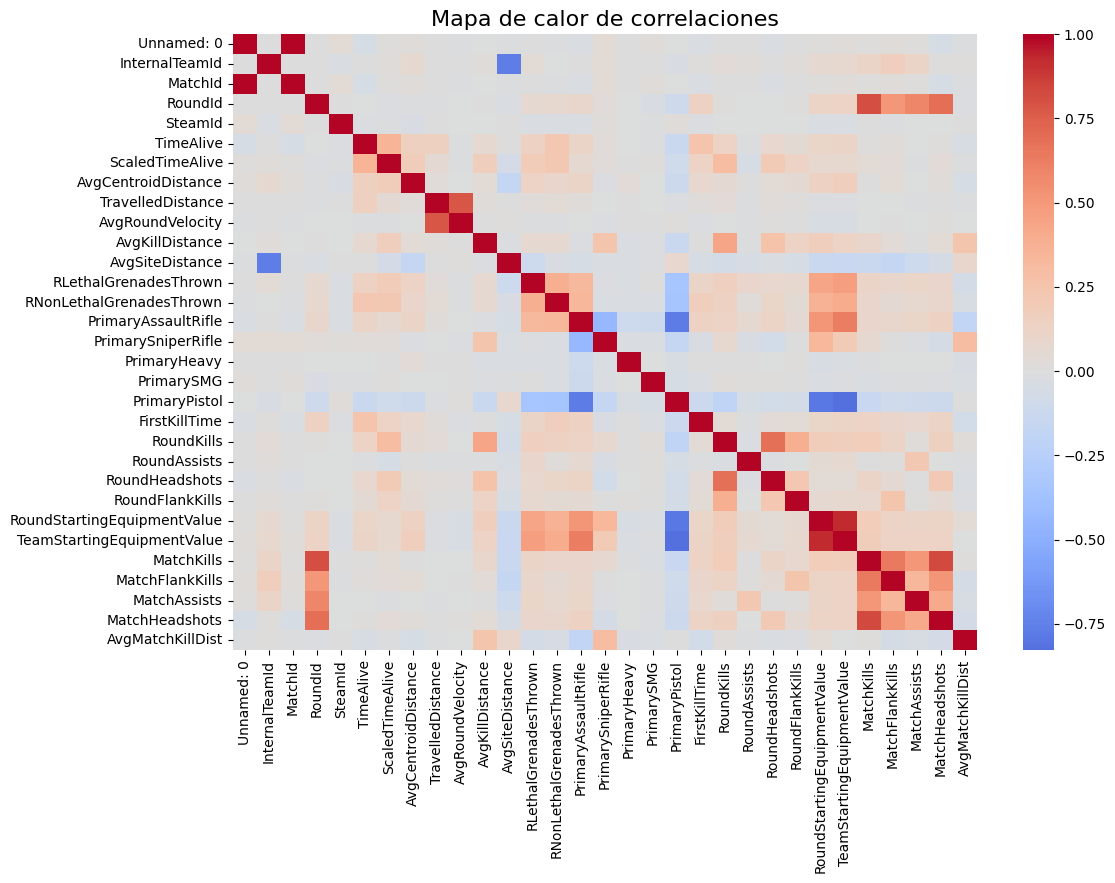

In [ ]:
numeric_df = data.select_dtypes(include=['int64', 'float64'])

corr_matrix = numeric_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False, center=0)
plt.title("Mapa de calor de correlaciones", fontsize=16)
plt.show()

In [ ]:
print("Correlación TimeAlive vs TravelledDistance:",
      corr_matrix.loc["TimeAlive", "TravelledDistance"])

print("Correlación TimeAlive con otras variables:")
print(corr_matrix["TimeAlive"].sort_values(ascending=False).head(10))

print("Correlación AvgKillDistance con otras variables:")
print(corr_matrix["AvgKillDistance"].sort_values(ascending=False).head(10))

Correlación TimeAlive vs TravelledDistance: 0.15369877426548448
Correlación TimeAlive con otras variables:
TimeAlive                     1.000000
ScaledTimeAlive               0.350282
FirstKillTime                 0.256827
RNonLethalGrenadesThrown      0.230716
TravelledDistance             0.153699
AvgCentroidDistance           0.151690
RLethalGrenadesThrown         0.149101
RoundKills                    0.127705
PrimaryAssaultRifle           0.113356
TeamStartingEquipmentValue    0.107670
Name: TimeAlive, dtype: float64
Correlación AvgKillDistance con otras variables:
AvgKillDistance                1.000000
RoundKills                     0.438542
RoundHeadshots                 0.259566
PrimarySniperRifle             0.246556
AvgMatchKillDist               0.244205
ScaledTimeAlive                0.170148
RoundStartingEquipmentValue    0.167371
TeamStartingEquipmentValue     0.133645
RoundFlankKills                0.133588
MatchKills                     0.087550
Name: AvgKillDistance,

# Fase 3 - Preparación de los datos

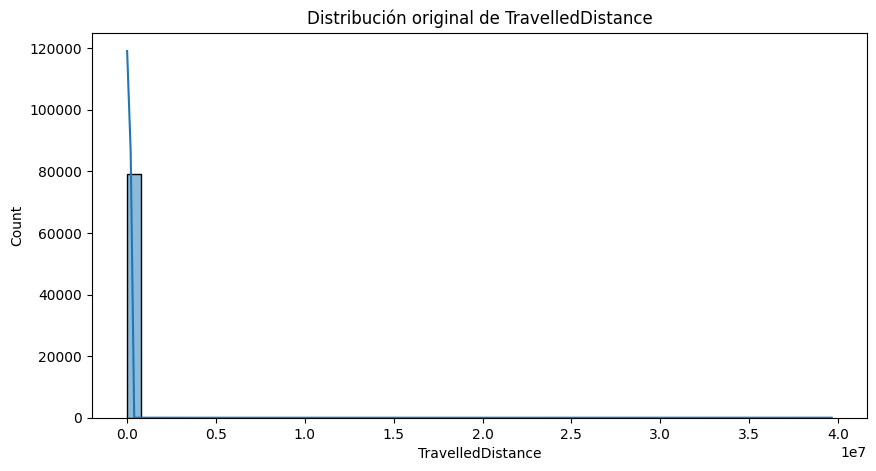

Antes de la transformación:
count    7.915700e+04
mean     1.041888e+05
std      3.543487e+05
min      0.000000e+00
25%      5.898255e+04
50%      8.601557e+04
75%      1.213966e+05
max      3.964645e+07
Name: TravelledDistance, dtype: float64


In [ ]:
# --- Distribución original ---
plt.figure(figsize=(10,5))
sns.histplot(data["TravelledDistance"], bins=50, kde=True)
plt.title("Distribución original de TravelledDistance")
plt.show()

# --- Comparar estadísticos ---
print("Antes de la transformación:")
print(data["TravelledDistance"].describe())



# 19. Justificación y aplicación correcta de transformación de variable continua


Me di cuenta que algunas variables, como **TravelledDistance**, estaban muy cargadas hacia un lado y tenían valores muy grandes. Para arreglar eso usé una transformación logarítmica (log(TravelledDistance + 1)).  

Con esto la variable queda más pareja y se puede analizar mejor sin que los valores extremos molesten tanto.

# 20. Justificación y aplicación correcta de transformación de variable discreta

En el caso de las variables discretas, la transformación se aplica cuando es necesario facilitar su interpretación o integrarlas mejor en los modelos.
Por ejemplo, si se tiene una variable como RoundKills (número de asesinatos), donde los valores suelen ser muy bajos pero con algunos casos aislados de valores altos, se puede aplicar una transformación binaria o de agrupación en categorías.

Binaria (0/1): si el interés está en distinguir entre "si hubo asesinatos" vs. "no tuvo asesinatos".

Agrupación en rangos: (0 = ningún asesinato, 1 = entre 1 y 2, 2 = tres o más), para reducir la dispersión y facilitar el análisis.

Esto evita que los valores más altos ejerzan un peso desproporcionado y permite interpretar la variable de forma más clara en contextos de predicción o segmentación.

In [ ]:
# Función para agrupar RoundKills en categorías
def categorizar_round_kills(x):
    if x == 0:
        return "0 Kills"
    elif x == 1:
        return "1 Kill"
    elif x == 2:
        return "2 Kills"
    else:
        return "3+ Kills"

# Crear nueva columna categórica
data["RoundKills_cat"] = data["RoundKills"].apply(categorizar_round_kills)

# Ver distribución de las categorías
print(data["RoundKills_cat"].value_counts(normalize=True).round(3) * 100)

# (Opcional) Si prefieres guardarlo como variable numérica para modelos:
# 0 = sin kills, 1 = kill simple, 2 = doble kill, 3 = tres o más
data["RoundKills_grouped"] = data["RoundKills"].apply(lambda x: 0 if x==0 else (1 if x==1 else (2 if x==2 else 3)))


RoundKills_cat
0 Kills     54.5
1 Kill      29.1
2 Kills     12.0
3+ Kills     4.4
Name: proportion, dtype: float64


# 21. Análisis de distribución de variable continua ANTES y DESPUÉS de transformación



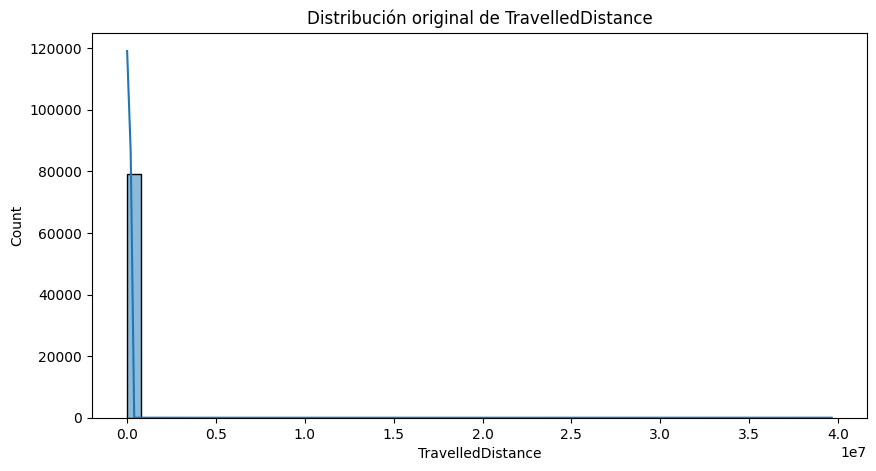

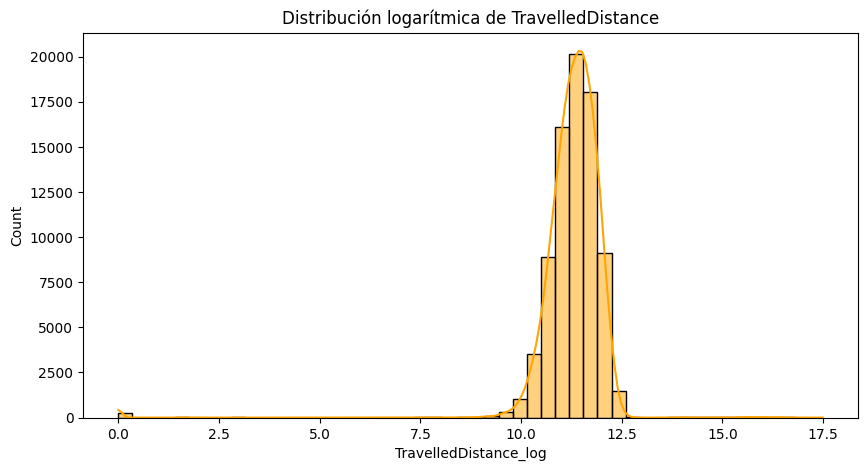

Antes de la transformación:
count    7.915700e+04
mean     1.041888e+05
std      3.543487e+05
min      0.000000e+00
25%      5.898255e+04
50%      8.601557e+04
75%      1.213966e+05
max      3.964645e+07
Name: TravelledDistance, dtype: float64

Después de la transformación:
count    79157.000000
mean        11.289388
std          0.879282
min          0.000000
25%         10.985014
50%         11.362295
75%         11.706827
max         17.495512
Name: TravelledDistance_log, dtype: float64


In [ ]:
# --- Distribución original ---
plt.figure(figsize=(10,5))
sns.histplot(data["TravelledDistance"], bins=50, kde=True)
plt.title("Distribución original de TravelledDistance")
plt.show()

# --- Transformación logarítmica ---
import numpy as np
data["TravelledDistance_log"] = np.log1p(data["TravelledDistance"])
# log1p(x) = log(x+1) evita problemas con ceros

# --- Distribución transformada ---
plt.figure(figsize=(10,5))
sns.histplot(data["TravelledDistance_log"], bins=50, kde=True, color="orange")
plt.title("Distribución logarítmica de TravelledDistance")
plt.show()

# --- Comparar estadísticos ---
print("Antes de la transformación:")
print(data["TravelledDistance"].describe())

print("\nDespués de la transformación:")
print(data["TravelledDistance_log"].describe())


Tomando como ejemplo la variable TravelledDistance:

Antes de la transformación: la distribución estaba muy sesgada hacia la derecha (asimétrica positiva). La mayoría de los datos se concentraban en valores bajos, mientras que algunos valores extremadamente altos generaban una cola larga. Esto podía distorsionar medias, varianzas y análisis de correlación.

Después de la transformación logarítmica (log(TravelledDistance + 1)): la distribución se volvió más simétrica y cercana a una normal. Los valores extremos se comprimieron, lo que redujo el efecto de los outliers. Como resultado, la variable transformada es más adecuada para métodos estadísticos que asumen normalidad y para algoritmos sensibles a escalas (ej. regresión lineal, clustering, PCA).

En conclusión, la transformación permitió homogeneizar la variable y mejorar la calidad de los análisis y modelos posteriores.